In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.DataFrame()

In [4]:
for i in range(5):
    df['Banner_type_'+str(i)] = np.random.randint(0, 2, 100000)

In [5]:
df.head()

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,0,1,0,0,0
1,1,1,0,1,1
2,1,0,1,0,1
3,1,0,1,1,1
4,0,1,0,1,1


In [6]:
num_iterations = 100000
num_banner = 5
count = np.zeros(num_banner)
sum_rewards = np.zeros(num_banner)
Q = np.zeros(num_banner)

In [7]:
banner_selected = []

In [8]:
def epsilon_greedy_policy(epsilon):
    if np.random.uniform(0,1) < epsilon:
        return np.random.choice(num_banner)
    else:
        return np.argmax(Q)

In [9]:
for i in range(num_iterations):
    banner = epsilon_greedy_policy(0.5)
    reward = df.values[i, banner]
    
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    
    banner_selected.append(banner)

In [10]:
print('The best banner is banner {}'.format(np.argmax(Q)))

The best banner is banner 3


/home/pedro/anaconda3/envs/universe/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


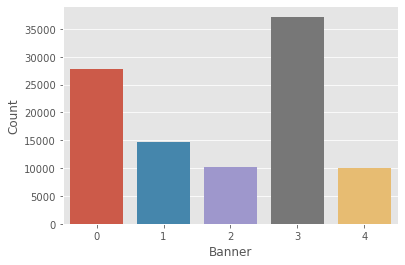

In [11]:
ax = sns.countplot(banner_selected)
ax.set(xlabel='Banner', ylabel='Count')
plt.show()